(0, 11), instance_id 196, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/1
instance_id 196 class_name sofa


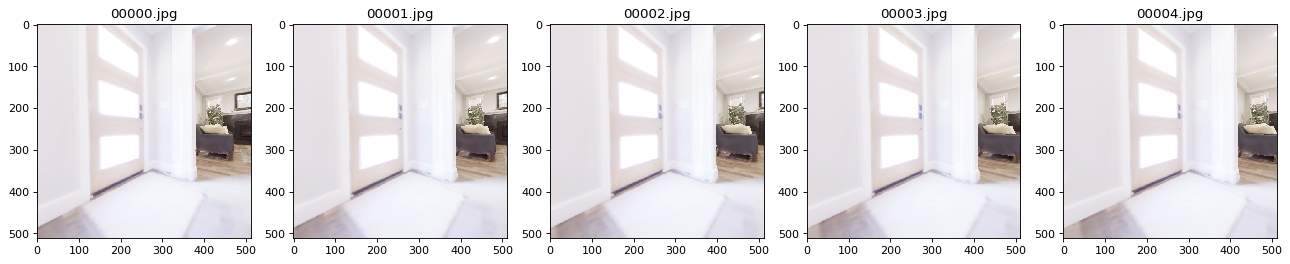

(229, 253), instance_id 196, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/2
instance_id 196 class_name sofa


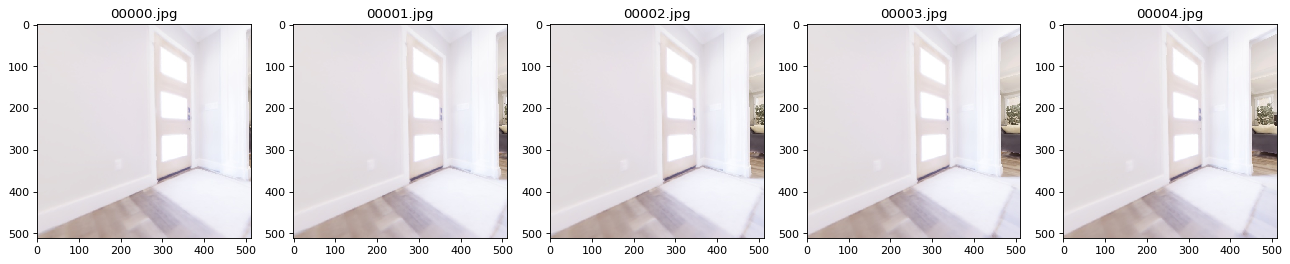

(254, 274), instance_id 404, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/3
instance_id 404 class_name chair


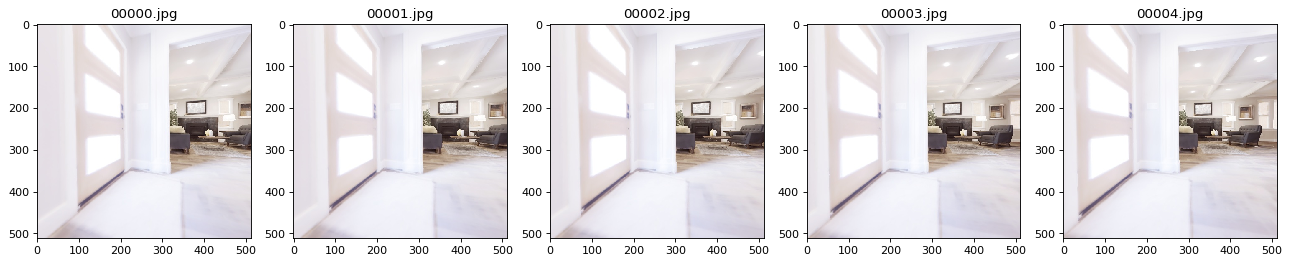

(275, 348), instance_id 196, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/4
instance_id 196 class_name sofa


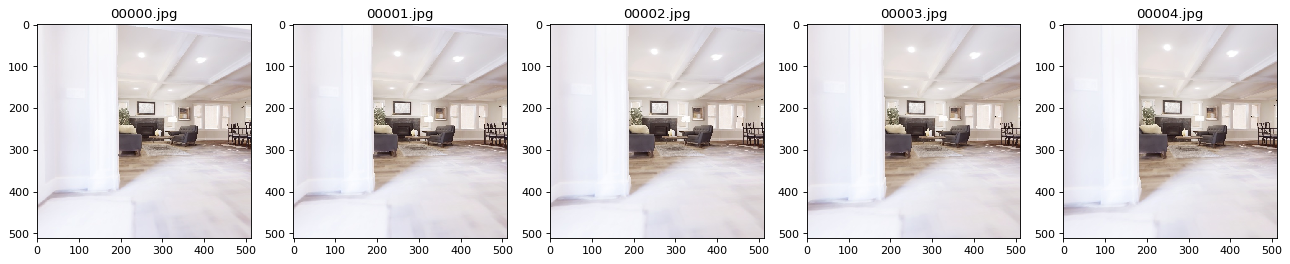

(405, 448), instance_id 129, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/5
instance_id 129 class_name vase


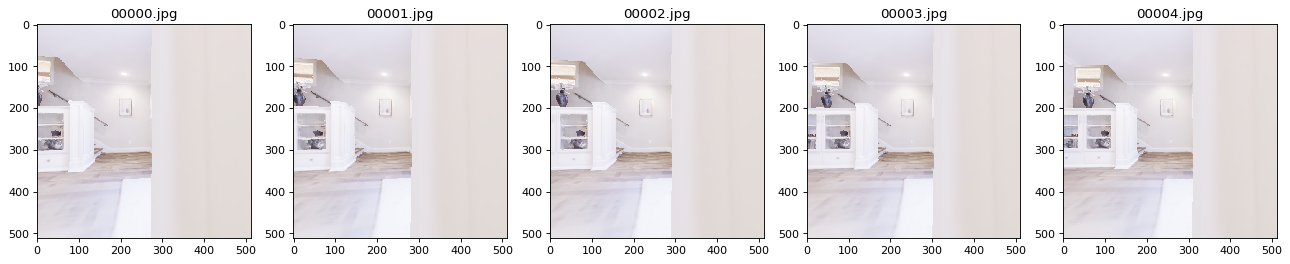

(460, 489), instance_id 404, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/6
instance_id 404 class_name chair


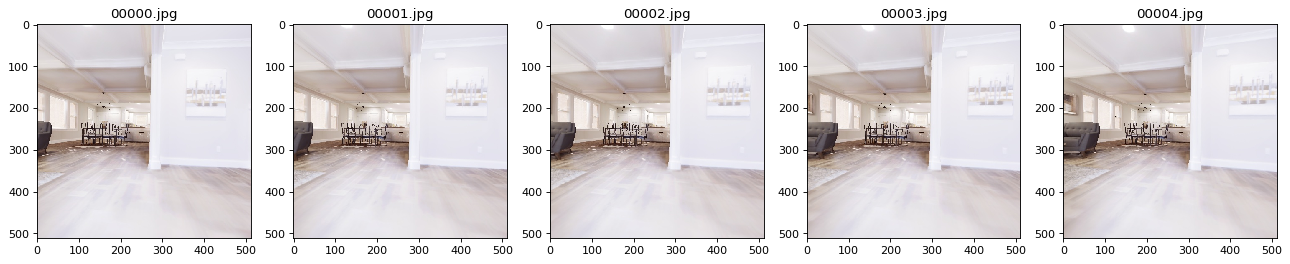

(490, 510), instance_id 196, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/7
instance_id 196 class_name sofa


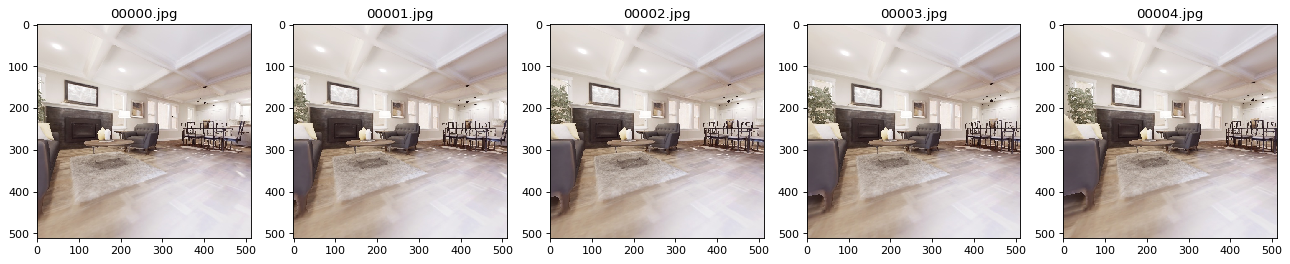

(511, 540), instance_id 404, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/8
instance_id 404 class_name chair


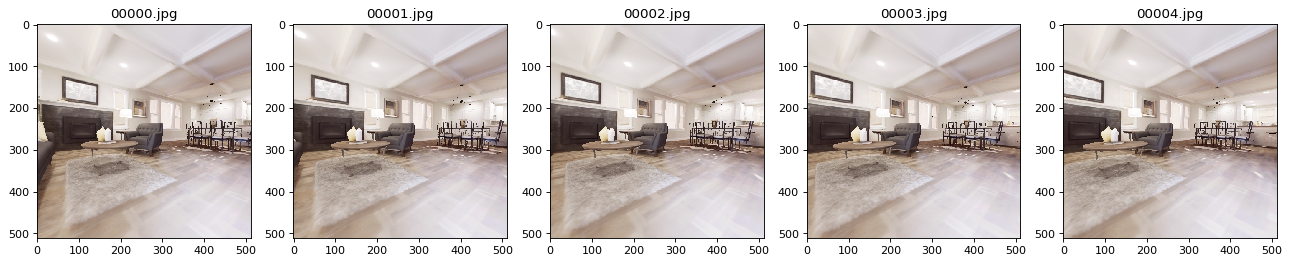

(541, 559), instance_id 243, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/9
instance_id 243 class_name door


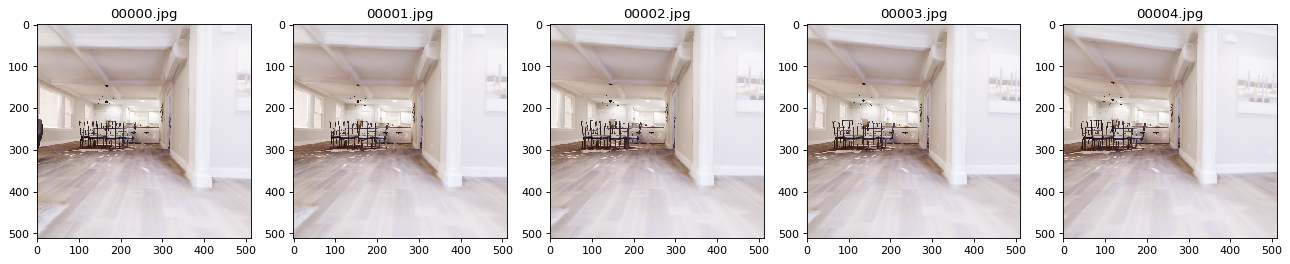

(571, 589), instance_id 243, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/10
instance_id 243 class_name door


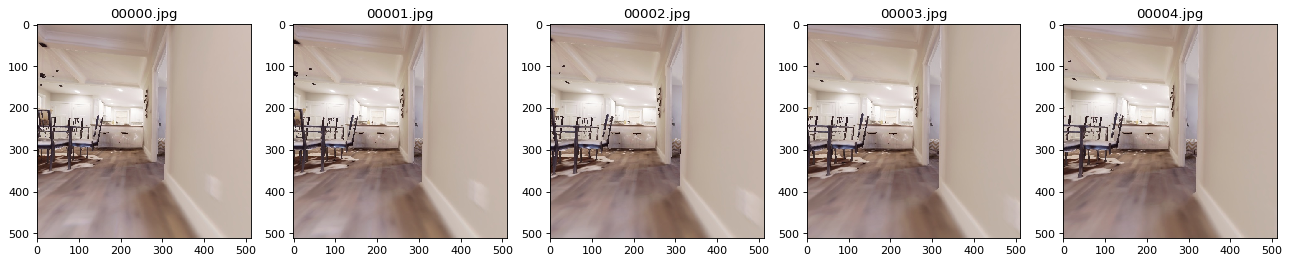

(590, 640), instance_id 133, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/11
instance_id 133 class_name chair


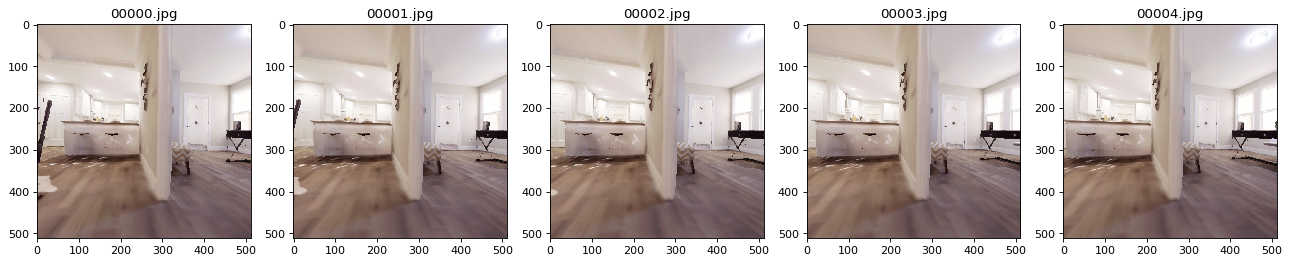

(772, 975), instance_id 172, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/12
instance_id 172 class_name chair


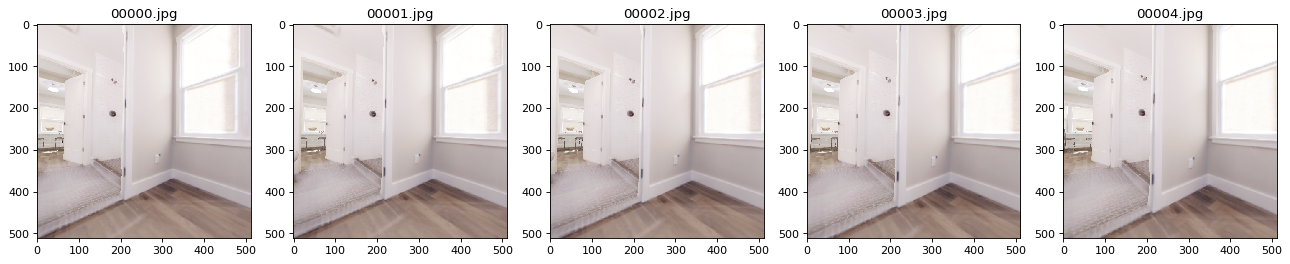

(1110, 1148), instance_id 243, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/13
instance_id 243 class_name door


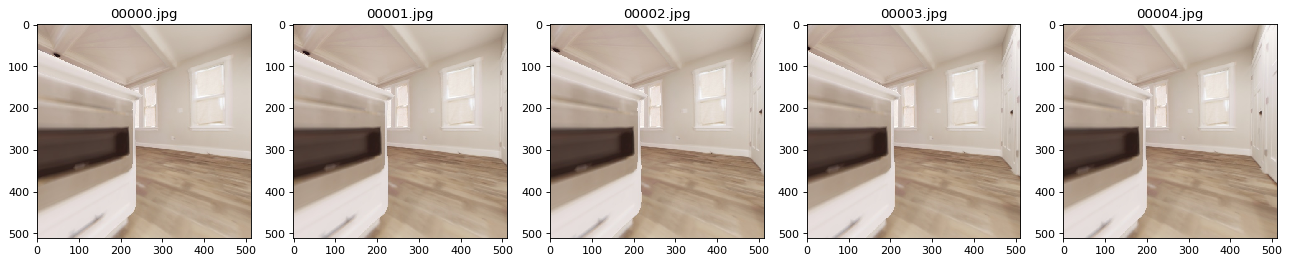

(1149, 1174), instance_id 404, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/14
instance_id 404 class_name chair


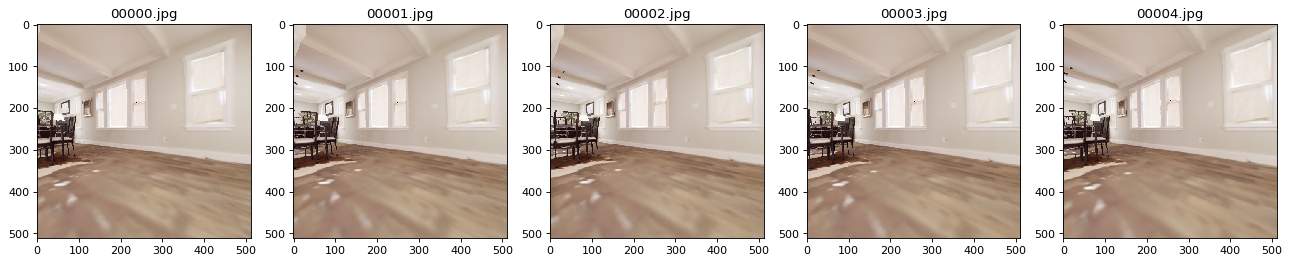

(1180, 1211), instance_id 404, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/15
instance_id 404 class_name chair


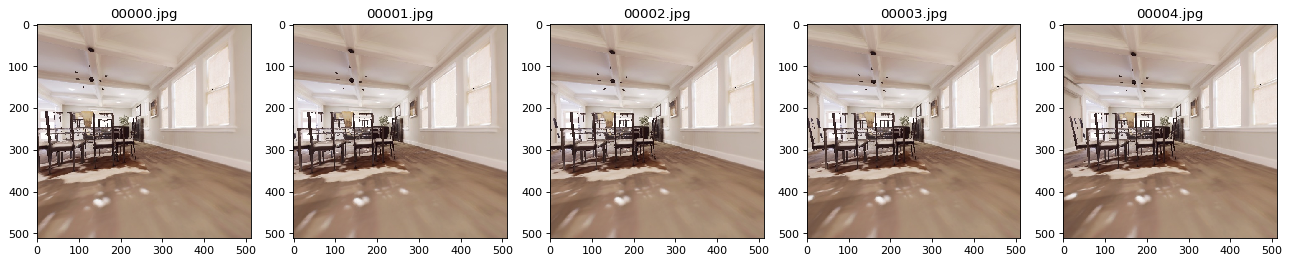

(1217, 1242), instance_id 404, traj_out /checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids/16
instance_id 404 class_name chair


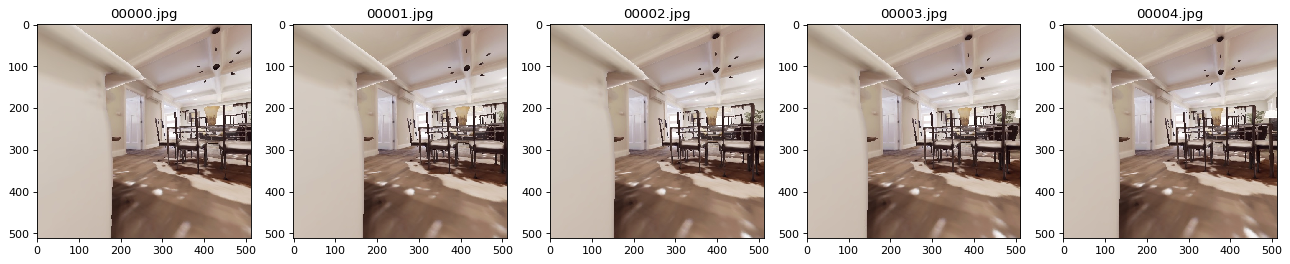

In [32]:

import os
import matplotlib.pyplot as plt
import cv2
from IPython.display import Video
import json
import numpy as np

ids_we_care_about = [193,404,196,172,243,133,129,170]

replica_root = '/datasets01/replica/061819/18_scenes'
habitat_semantic_json = os.path.join(replica_root, 'apartment_0', 'habitat', 'info_semantic.json')
#         habitat_semantic_json = os.path.join(self.sjr, scene + '_info_semantic.json')
#         print(f"Using habitat semantic json {habitat_semantic_json}")
with open(habitat_semantic_json, "r") as f:
    hsd = json.load(f)
    
# print(hsd['classes'])
id_to_class_dict = {}
for x in hsd['classes']:
    id_to_class_dict[x['id']] = x['name']
    
data_dir = '/checkpoint/apratik/data/data/apartment_0/default/no_noise/mul_traj_200_combined_2'
out_dir = '/checkpoint/apratik/data/data/apartment_0/default/no_noise/instance_detection_ids'

def get_maximal_relevant_id(x, traj_path):
    image_id = int(x.split('.')[0])
#     print(f'image_id {image_id}')
    
    seg = os.path.join(traj_path, 'seg')
    prop_path = os.path.join(seg, "{:05d}.npy".format(image_id))
    annot = np.load(prop_path).astype(np.uint32)
    
    ans = -1
    maxarea = 0
    for x in np.unique(annot):
        if x in ids_we_care_about:
            binary_mask = (annot == x).astype(np.int32)
            area = binary_mask.sum()
            if area > maxarea:
                maxarea = area
                ans = x
    return ans
    
    
from shutil import copyfile, rmtree
import json
import os
import matplotlib.pyplot as plt
import cv2

def acopyjson(a, b, r):
    with open(a, "r") as f:
        dat = json.load(f)
    
    new_dat = {}
    ctr = 0 
    for x in range(r[0], r[1]+1):
        new_dat.update({ctr: dat[str(x)]})
        ctr += 1
    with open(b, "w") as fp:
        json.dump(new_dat, fp)


def acopydir(a, b, ext, r):
#     print(f'acopydir {r}')
    if not os.path.isdir(b):
        os.makedirs(b)    
    ctr = 0
    for x in range(r[0], r[1]+1):
        f = "{:05d}{}".format(x, ext)
#         print(f)
        copyfile(os.path.join(a,f), os.path.join(b,"{:05d}{}".format(ctr, ext)))
        ctr += 1
    
    
def save_traj(start, end, traj_dir, inst_id, traj_out):
    print(f'{start, end}, instance_id {inst_id}, traj_out {traj_out}')
    if os.path.isdir(traj_out):
        rmtree(traj_out)
    os.makedirs(traj_out)
    
    # copy rgb, seg, depth and data.json
    acopydir(os.path.join(traj_dir, 'rgb'), os.path.join(traj_out, 'rgb'), '.jpg', (start,end))   
    acopydir(os.path.join(traj_dir, 'depth'), os.path.join(traj_out, 'depth'), '.npy', (start,end))
    acopydir(os.path.join(traj_dir, 'seg'), os.path.join(traj_out, 'seg'), '.npy', (start,end))
    acopyjson(os.path.join(traj_dir, 'data.json'), os.path.join(traj_out, 'data.json'), (start,end))
    
    # write instance id to a text file
    with open("instance_id.txt", "a") as f:
        s = "instance_id " + str(inst_id) + ' class_name ' + id_to_class_dict[hsd['id_to_label'][inst_id]]
        print(f"{s}")
        f.write(s)

#     view 5 images from traj_out
    fig, axs = plt.subplots(1, 5, figsize=(20,8), dpi=80)
    imgs = os.listdir(os.path.join(traj_out, 'rgb'))
    for x in range(5):
        axs[x].imshow(cv2.cvtColor(cv2.imread(os.path.join(traj_out, 'rgb', imgs[x])), cv2.COLOR_BGR2RGB))
        axs[x].set_title(imgs[x])
    plt.show()

    
# for x in range(2, num_traj):
x = 1
out_traj_id = 1

traj_path = os.path.join(data_dir, str(x))
if os.path.isdir(traj_path):
    # visualize the rgb_dbg dir
    rgb = os.path.join(traj_path, 'rgb')
    imgs = os.listdir(rgb)
    
    img_id_map = []
    
    for x in range(len(imgs)):
        ncur = get_maximal_relevant_id(imgs[x], traj_path)
        img_id_map.append(ncur)
        
    assert len(img_id_map) == len(imgs)
       
    x = 0
    while x < len(img_id_map):
        cur = img_id_map[x]
        if cur != -1:
            start = x
            while x < len(img_id_map) and img_id_map[x] == cur:
                end = x
                x += 1
            if abs(start - end) > 10: # should have atleast 10 frames
                save_traj(start, end, traj_path, cur, os.path.join(out_dir, str(out_traj_id)))
                out_traj_id += 1
        else:
            x += 1

<img src=vid_path align="center">